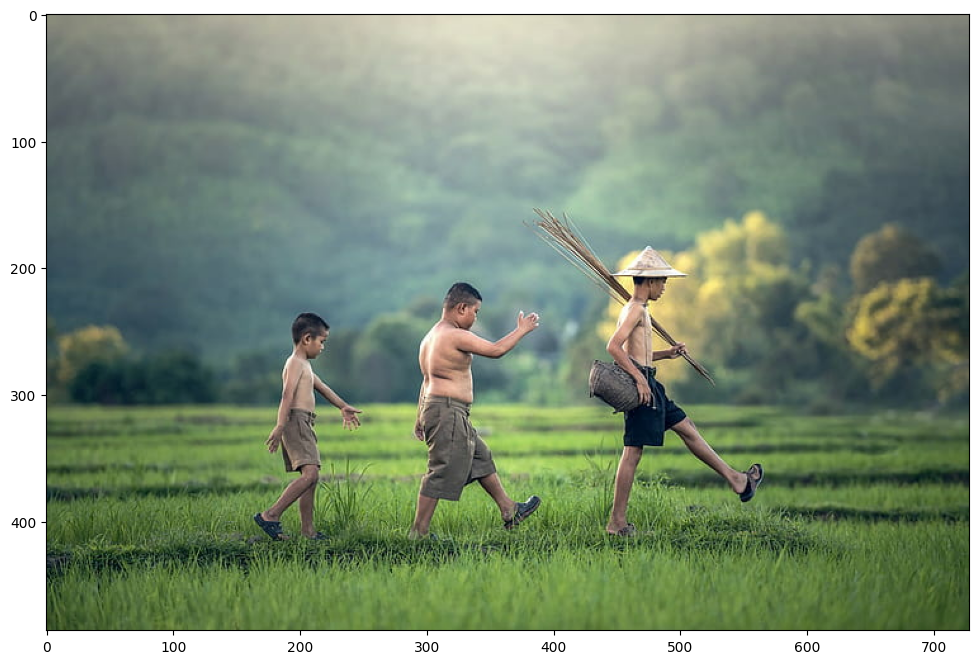

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("test.jpg")
color_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,8))
plt.imshow(color_img)
plt.show()

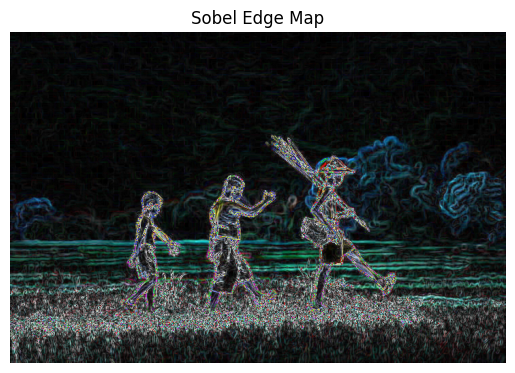

In [2]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Magnitude
sobel_mag = np.sqrt(sobelx**2 + sobely**2)
sobel_mag = np.uint8(sobel_mag)

plt.imshow(sobel_mag, cmap="gray")
plt.title("Sobel Edge Map")
plt.axis("off")
plt.show()

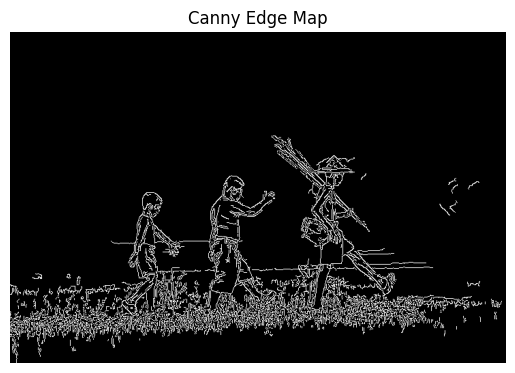

In [3]:
img = cv2.imread("test.jpg", 0)

canny = cv2.Canny(
    img,
    threshold1=100,
    threshold2=200
)

plt.imshow(canny, cmap="gray")
plt.title("Canny-Edge Map")
plt.axis("off")
plt.show()


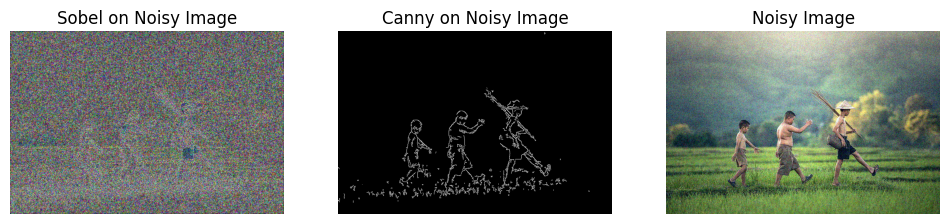

In [10]:
img = cv2.imread("test.jpg")
color_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Add Gaussian noise
noise = np.random.normal(0, 25, color_img.shape)
noisy = color_img + noise
noisy = np.clip(noisy, 0, 255).astype(np.uint8)


# Sobel on noisy image
sx = cv2.Sobel(noisy, cv2.CV_64F, 1, 0, ksize=3)
sy = cv2.Sobel(noisy, cv2.CV_64F, 0, 1, ksize=3)
sobel_noisy = np.uint8(np.sqrt(sx**2 + sy**2))

# Canny on noisy image
canny_noisy = cv2.Canny(noisy, 300, 600)

# Display comparison
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.imshow(sobel_noisy, cmap="gray")
plt.title("Sobel on Noisy Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(canny_noisy, cmap="gray")
plt.title("Canny on Noisy Image")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(noisy, cmap="gray")
plt.title("Noisy Image")
plt.axis("off")

plt.show()
